In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
suicide_df = pd.read_csv(r'C:\Users\taewoo\Desktop\Datasets\who_suicide_statistics.csv')
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [3]:
suicide_df.head(10)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [4]:
suicide_df.tail(10)

,country,year,sex,age,suicides_no,population
43766,Zimbabwe,1990,female,35-54 years,45.0,NaN
43767,Zimbabwe,1990,female,5-14 years,6.0,NaN
43768,Zimbabwe,1990,female,55-74 years,20.0,NaN
43769,Zimbabwe,1990,female,75+ years,3.0,NaN
43770,Zimbabwe,1990,male,15-24 years,132.0,NaN
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN
43775,Zimbabwe,1990,male,75+ years,13.0,NaN


As I want to do the analysis on data of 21st century, I need to create some filters.

### Data Cleaning

#### Dealing with NaN values

In [5]:
suicide_21 = suicide_df[suicide_df['year'] >= 2000]
suicide_21.head()

,country,year,sex,age,suicides_no,population
180,Albania,2000,female,15-24 years,6.0,263900.0
181,Albania,2000,female,25-34 years,3.0,245800.0
182,Albania,2000,female,35-54 years,5.0,332200.0
183,Albania,2000,female,5-14 years,0.0,324700.0
184,Albania,2000,female,55-74 years,0.0,168000.0


In [6]:
suicide_21.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no     444
population     2904
dtype: int64

In [7]:
suicide_index = []
population_index = []
for i, (suicide_item, population_item) in enumerate(zip(suicide_21['suicides_no'].isnull(), suicide_21['population'].isnull())):
    if suicide_item == True:
        suicide_index.append(i)
    elif population_item == True:
        population_index.append(i)

    
print(len(suicide_index))
print(len(population_index))

444
2904


In [8]:
suicide_nan = suicide_21.iloc[suicide_index]  # a dataframe of all rows with nan values of the suicides_no column
nan_countries = suicide_nan['country'].unique()  # countries with nan values in the suicides_no column

for country in nan_countries:
    print(suicide_nan[suicide_nan['country']==country])

     country  year     sex          age  suicides_no  population
312  Albania  2011  female  15-24 years          NaN    258006.0
313  Albania  2011  female  25-34 years          NaN    184556.0
314  Albania  2011  female  35-54 years          NaN    394638.0
315  Albania  2011  female   5-14 years          NaN    210822.0
316  Albania  2011  female  55-74 years          NaN    250641.0
317  Albania  2011  female    75+ years          NaN     67649.0
318  Albania  2011    male  15-24 years          NaN    275385.0
319  Albania  2011    male  25-34 years          NaN    185898.0
320  Albania  2011    male  35-54 years          NaN    368950.0
321  Albania  2011    male   5-14 years          NaN    228071.0
322  Albania  2011    male  55-74 years          NaN    250362.0
323  Albania  2011    male    75+ years          NaN     54228.0
324  Albania  2012  female  15-24 years          NaN    249730.0
325  Albania  2012  female  25-34 years          NaN    187346.0
326  Albania  2012  femal

There's a decision to make here.

* For countries that are missing suicides_no for just a year or two, I can calculate the average and substitute the NaN values. However, for the ones that are missing for more, I will have to see whether I want to drop the country as a whole or only drop those rows.


In [9]:
suicide_21['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [10]:
nan_year_dict = {}  # countries and years where nan values are in suicides_co
for country in nan_countries:
    nan_year_dict[country] = suicide_nan.loc[suicide_nan['country']==country]['year'].unique()
print(nan_year_dict)

{'Albania': array([2011, 2012, 2013, 2014, 2015], dtype=int64), 'Armenia': array([2004, 2005], dtype=int64), 'Australia': array([2005], dtype=int64), 'Azerbaijan': array([2005], dtype=int64), 'Belarus': array([2004, 2005, 2006, 2012, 2015], dtype=int64), 'Bosnia and Herzegovina': array([2010, 2012], dtype=int64), 'Cyprus': array([2002, 2003], dtype=int64), 'Georgia': array([2002, 2003, 2008], dtype=int64), 'Israel': array([2016], dtype=int64), 'Kiribati': array([2011], dtype=int64), 'Philippines': array([2013, 2014], dtype=int64), 'Portugal': array([2004, 2005, 2006], dtype=int64), 'San Marino': array([2011, 2012, 2013, 2014, 2015], dtype=int64), 'Slovakia': array([2011], dtype=int64), 'TFYR Macedonia': array([2014], dtype=int64), 'United Kingdom': array([2016], dtype=int64), 'United States of America': array([2016], dtype=int64)}


In [11]:
for country in nan_countries:
    print(f'{country}')
    print('unique years:\n{}'.format(suicide_21.loc[suicide_21['country']==country]['year'].unique()))
    print('years with NaN suicides_no:\n {} \n'.format(nan_year_dict[country]))

Albania
unique years:
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
years with NaN suicides_no:
 [2011 2012 2013 2014 2015] 

Armenia
unique years:
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016]
years with NaN suicides_no:
 [2004 2005] 

Australia
unique years:
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
years with NaN suicides_no:
 [2005] 

Azerbaijan
unique years:
[2000 2001 2002 2003 2004 2005 2007]
years with NaN suicides_no:
 [2005] 

Belarus
unique years:
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
years with NaN suicides_no:
 [2004 2005 2006 2012 2015] 

Bosnia and Herzegovina
unique years:
[2010 2011 2012 2014]
years with NaN suicides_no:
 [2010 2012] 

Cyprus
unique years:
[2000 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]
years with NaN suicides_no:
 [2002 2003] 

Georgia
unique years:
[2000

I'm going to drop 
* Albania
* Azerbaijan
* Belarus
* Kiribati
* Philippines
* Portugal
* San Marino

and try to use average values for

* Armenia
* Australia
* Bosnia and Herzegovina
* Cyprus
* Georgia
* Israel
* Slovakia
* TFYR Macedonia
* United Kingdom
* United States of America

In [12]:
drop_countries = {'Albania', 'Azerbaijan', 'Belarus', 'Kiribati', 'Philippines', 'Portugal', 'San Marino'}
pre_cleaned_df = suicide_21.copy()
print(f'The shape of the dataframe before dropping some countries: {pre_cleaned_df.shape}')

for country in drop_countries:
    indexes = pre_cleaned_df.loc[pre_cleaned_df['country'] == country].index
    pre_cleaned_df.drop(indexes, inplace=True)
    
print(f'The shape of the dataframe after dropping: {pre_cleaned_df.shape}')

The shape of the dataframe before dropping some countries: (21792, 6)
The shape of the dataframe after dropping: (20868, 6)


In [13]:
cleaned_df = pre_cleaned_df.copy()
cleaned_df.head(20)

,country,year,sex,age,suicides_no,population
528,Anguilla,2000,female,15-24 years,0.0,NaN
529,Anguilla,2000,female,25-34 years,0.0,NaN
530,Anguilla,2000,female,35-54 years,0.0,NaN
531,Anguilla,2000,female,5-14 years,0.0,NaN
532,Anguilla,2000,female,55-74 years,0.0,NaN
533,Anguilla,2000,female,75+ years,0.0,NaN
534,Anguilla,2000,male,15-24 years,0.0,NaN
535,Anguilla,2000,male,25-34 years,0.0,NaN
536,Anguilla,2000,male,35-54 years,0.0,NaN
537,Anguilla,2000,male,5-14 years,0.0,NaN


'Albania', 'Azerbaijan', 'Belarus', 'Kiribati', 'Philippines', 'Portugal', 'San Marino' are dropped from the dataframe.

Now, I have to find averages of

'Armenia', 'Australia', 'Bosnia and Herzegovina', 'Cyprus', 'Georgia', 'Israel', 'Slovakia', 'TFYR Macedonia', 'United Kingdom', 'United States of America' to fill in NaN values

In [14]:
fill_country = ['Armenia', 'Australia', 'Bosnia and Herzegovina', 'Cyprus', 'Georgia', 'Israel',
                'Slovakia', 'TFYR Macedonia', 'United Kingdom', 'United States of America']

for country in fill_country:
    temp = cleaned_df[cleaned_df['country']==country]  # a temporary dataframe to use the mean method on
    indexes = temp.index
    mean = round(temp['suicides_no'].mean(), 2)  # mean values of suicides committed in a country
    for i in indexes:
        cleaned_df.at[i, 'suicides_no'] = mean  # update the value in a specific position

In [15]:
cleaned_df.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no       0
population     2892
dtype: int64

It's time to deal with the population column now

In [16]:
nan_population = cleaned_df.loc[cleaned_df['population'].isnull()==True].index  # indexes of nan population
nan_population_countries = cleaned_df.loc[nan_population]['country'].unique()  # countries with nan population rows

for country in nan_population_countries:
    print(country)
    print('Unique population values {} \n'.format(cleaned_df.loc[cleaned_df['country']==country]['population'].unique())
)

Anguilla
Unique population values [nan] 

Bermuda
Unique population values [nan] 

Bolivia
Unique population values [nan] 

British Virgin Islands
Unique population values [nan] 

Cayman Islands
Unique population values [nan] 

Dominica
Unique population values [nan] 

Dominican Republic
Unique population values [nan] 

Haiti
Unique population values [nan] 

Honduras
Unique population values [nan] 

Iraq
Unique population values [nan] 

Jordan
Unique population values [nan] 

Malaysia
Unique population values [nan] 

Montserrat
Unique population values [nan] 

Morocco
Unique population values [nan] 

Netherlands Antilles
Unique population values [nan] 

Nicaragua
Unique population values [    nan 594335. 497514. 599881. 609040. 238978.  62723. 614837. 477796.
 524715. 642002. 199900.  45706. 593303. 508442. 616933. 603810. 250720.
  65290. 615256. 490946. 539194. 637235. 208944.  47848. 591526. 518676.
 634573. 599655. 263316.  67819. 615327. 503628. 554382. 633724. 218891.
  49926. 58

In [17]:
for country in ['Nicaragua', 'Rodrigues']:
    print(country)
    print('Number of all rows: {}'.format(cleaned_df.loc[cleaned_df['country']=='Nicaragua'].shape[0])
    )
    print('Number of rows with NaN values: {}'.format(len(cleaned_df.loc[cleaned_df['country']=='Nicaragua']['population'].unique()))
    )
    print(round(len(cleaned_df.loc[cleaned_df['country']=='Nicaragua']['population'].unique())/
                    cleaned_df.loc[cleaned_df['country']=='Nicaragua'].shape[0], 2
               )
         )
    print('')

Nicaragua
Number of all rows: 192
Number of rows with NaN values: 73
0.38

Rodrigues
Number of all rows: 192
Number of rows with NaN values: 73
0.38



For Nicaragua:
38% are NaN values, so it will be better to exclude the data from Nicaragua

For Rodrigues:
77% are NaN values, so I defintiely can't use this data.

Conclusion: it's probably best to remove all countries nan_population_countries

In [18]:
print(f'Before dropping rows with nan values in the population column: {cleaned_df.shape}')

for country in nan_population_countries:
    indexes = cleaned_df.loc[cleaned_df['country'] == country].index
    cleaned_df.drop(indexes, inplace=True)

print(f'After dropping those rows: {cleaned_df.shape}')

Before dropping rows with nan values in the population column: (20868, 6)
After dropping those rows: (17760, 6)


In [20]:
cleaned_df.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

We're done dealing with NaN values. Now, let's see if there are outliers!

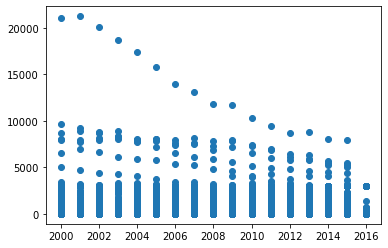

In [23]:
plt.scatter(x=cleaned_df['year'], y=cleaned_df['suicides_no'])